# Supervised Learning Coursework 1
Note - this notebook can run end-to-end in approximately 10-15 minutes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers import *
from typing import NamedTuple


# %load_ext autoreload
# %autoreload 2

# np.random.seed(1234)  # give a fixed seed for reproducability
np.random.seed(123)  # give a fixed seed for reproducability

plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11


## Part 1
### 1.1 Linear Regression

Given the dataset we want to use linear regression to fit the polynomial bases of dimension k=1,2,3,4, m - number of data points. Where X is (m x n), y is a vector (m x 1), w is (n x m), degree of polynomial

$$\mathbf{w} = (X^\top X)^{−1}X^\top \mathbf{y}$$

Squared errors:

$$\text{SSE} = \sum_{l=1}^{m} (y_l - w \cdot x_l)^2=(Xw - y)^T (Xw - y)$$

Empirical mean squre error:
$$\varepsilon_{\text{emp}}(S, w) = \frac{1}{m} (Xw - y)^T (Xw - y)$$

#### Question 1
Fitting the dataset of 4 points with polynomial bases of dimensions k=1,2,3,4:

y =  2.50x^0
y =  1.50x^0 + 0.40x^1
y =  9.00x^0 + -7.10x^1 + 1.50x^2
y =  -5.00x^0 + 15.17x^1 + -8.50x^2 + 1.33x^3


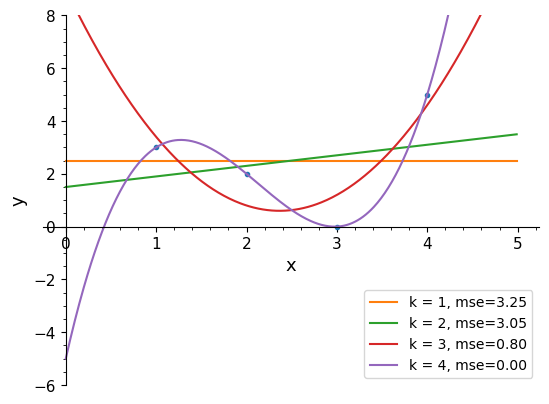

In [2]:
LIMITS_Q1 = (-6, 8)
POLYNOMIAL_DEGREES_Q1 = np.array([1, 2, 3, 4])

dataset = [(1, 3), (2, 2), (3, 0), (4, 5)]
x = np.array([xi for xi, _ in dataset])
y = np.array([yi for _, yi in dataset])

fig, ax = plt.subplots()

ax.plot(x, y, '.')

x_range_Q1 = np.arange(0, 5, 0.01)
plot_Q1 = PlotData(x_range=x_range_Q1, limits=LIMITS_Q1, ax=ax)

polynomial_data_map_Q1 = polynomial_map(x, POLYNOMIAL_DEGREES_Q1)
polynomial_prediction_map_Q1 = polynomial_map(x_range_Q1, POLYNOMIAL_DEGREES_Q1)
Q1A_polynomials = fit_linear_regressions(
    y, polynomial_data_map_Q1, POLYNOMIAL_DEGREES_Q1, plot_Q1,
    x_range_mapped=polynomial_prediction_map_Q1
)
for _, fit in Q1A_polynomials.items():
    print(
        'y = ', ' + '.join(f'{w:.2f}x^{i}' for i, w in enumerate(fit.w))
    )

plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
fig.savefig('LeastSquares_1a.png', dpi=300)

#### Question 2 Overfitting
$$g_{\sigma}(x) := \sin^2(2\pi x) + \varepsilon$$
##### 2a Creating the dataset:

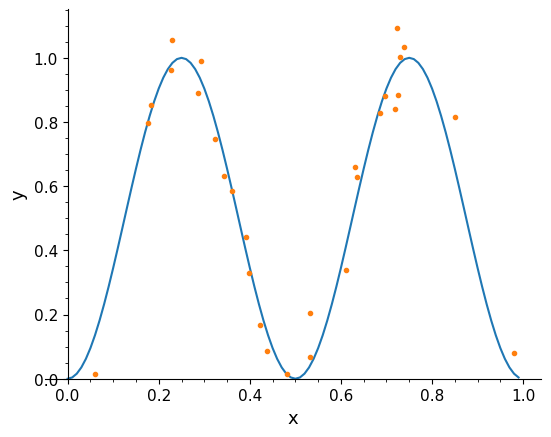

In [3]:
S_x, S_y = generate_data_points(30)
X_RANGE_Q2 = np.arange(0, 1, 0.01)
plot_sin_function_Q2a(S_x, S_y, X_RANGE_Q2)

Fitting the dataset with polynomial bases of dimensions k = 2, 5, 10, 14, 18

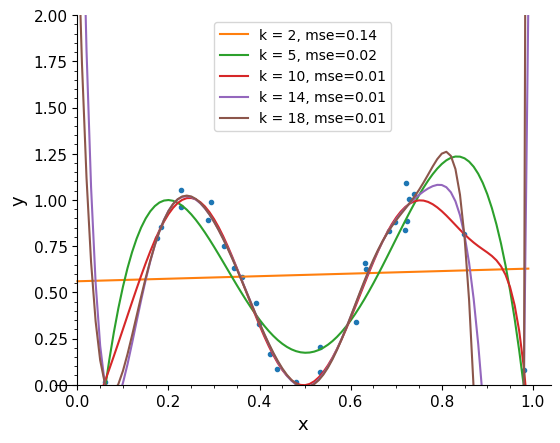

In [4]:
fig, ax = plt.subplots()
ax.plot(S_x, S_y, '.')

POLYNOMIAL_DEGREES_Q2a = np.array([2, 5, 10, 14, 18])

# Create the mapping for all k=1...18 here so we can reuse
DIMENSIONS_TO_18 = np.arange(1, 19, dtype=int)  # k = 1...18
# Map the sample data using a polynomial map
polynomial_data_map_to_18_30_points = polynomial_map(S_x, DIMENSIONS_TO_18)

# Map the x-range for the plot using a polynomial map
plt_x_range_mapped = polynomial_map(X_RANGE_Q2, DIMENSIONS_TO_18)

plot_Q2 = PlotData(x_range=X_RANGE_Q2, limits=(0, 2), ax=ax)
fit_linear_regressions(
    S_y, polynomial_data_map_to_18_30_points, POLYNOMIAL_DEGREES_Q2a, plot_Q2,
    x_range_mapped=plt_x_range_mapped
)
plt.legend(loc='upper center')
plt.xlabel("x")
plt.ylabel("y")
fig.savefig('PolyFit_2_a_ii.png', dpi=300)

##### 2b Fitting the dataset with polynomial basis k=1,...18 and plot the natural log of the training error against the dimension

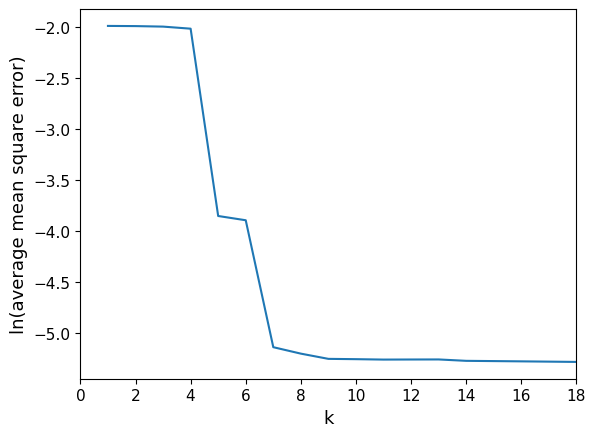

In [5]:
k18_fitted_polynomials = fit_linear_regressions(
    S_y, polynomial_data_map_to_18_30_points, DIMENSIONS_TO_18
)

log_mean_square_errors_Q2 = np.log(np.array([model.mse for model in k18_fitted_polynomials.values()]))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors_Q2, 'MSE_training_2_b.png');


##### 2 c Testing error

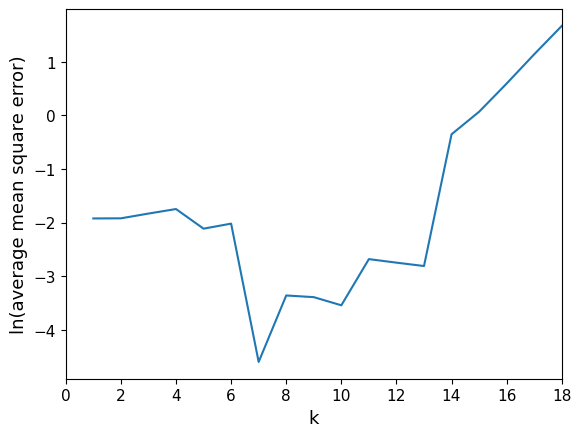

In [6]:
TEST_COUNT = 1000
T_x, T_y_actual = generate_data_points(TEST_COUNT)
T_x_mapped = polynomial_map(T_x, DIMENSIONS_TO_18)

log_mean_square_errors = np.log(np.array(calculate_test_mse(k18_fitted_polynomials, T_x_mapped, T_y_actual, T_x)))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors, 'MSE_testing_2_c.png');


##### 2d - smoothing over different runs

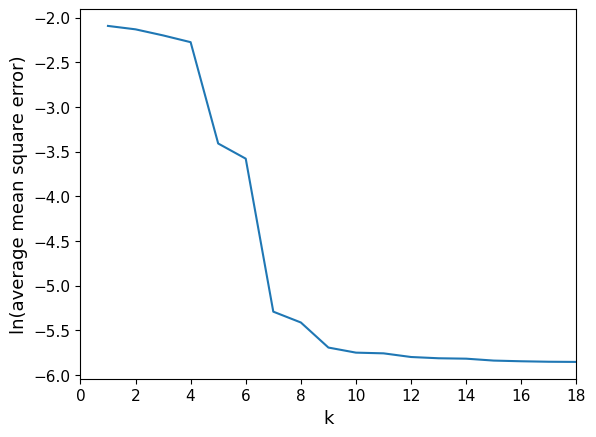

In [7]:
test_mses, train_mses = run_linear_regressions(map_function=polynomial_map)
log_mean_square_errors_train = np.log(np.array(train_mses).mean(axis=0))

plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors_train, 'MSE_100_training_2_d.png');

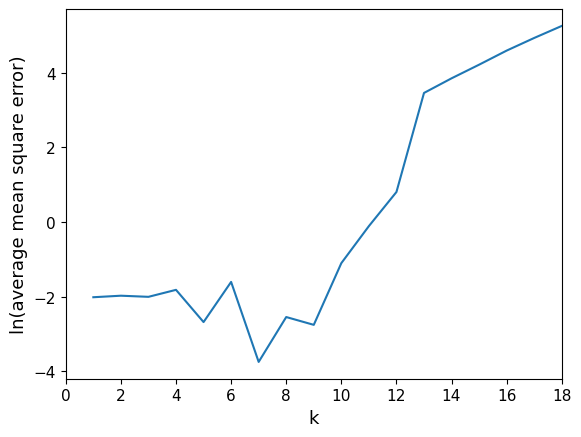

In [8]:
log_mean_square_errors_test = np.log(np.array(test_mses).mean(axis=0))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors_test, 'MSE_100_testing_2_d.png');

#### Question 3 New sin basis
$$\{\sin(1πx), \sin(2πx), \sin(3πx), . . . , \sin(kπx)\}$$

##### 3b Repeating part 2b with sin_map

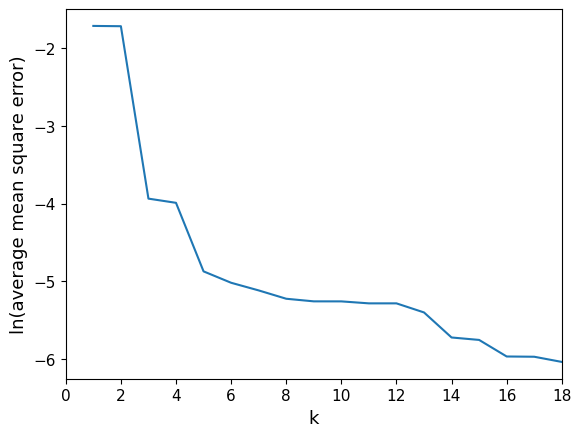

In [9]:
S_x_mapped_sin = sin_map(S_x, DIMENSIONS_TO_18)
fitted_sins = fit_linear_regressions(S_y, S_x_mapped_sin, DIMENSIONS_TO_18)

log_mean_square_errors = np.log(np.array([fit.mse for fit in fitted_sins.values()]))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors, 'MSE_training_3_b.png');

##### 3c Repeating part 2c with sin_map

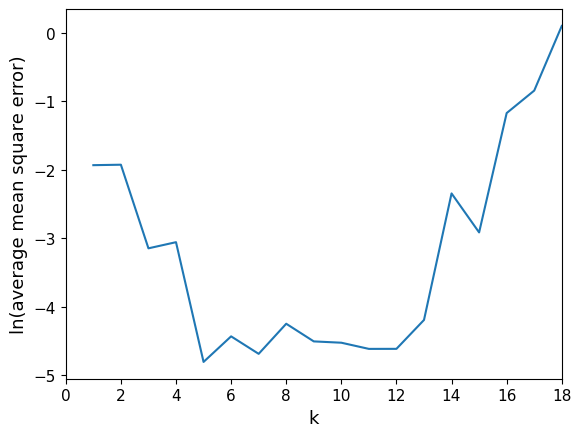

In [10]:
T_x_mapped = sin_map(T_x, DIMENSIONS_TO_18)
log_mean_square_errors = np.log(np.array(calculate_test_mse(fitted_sins, T_x_mapped, T_y_actual, T_x)))

plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors, 'MSE_testing_3_c.png');

##### 3d Repeating part 2d with sin_map

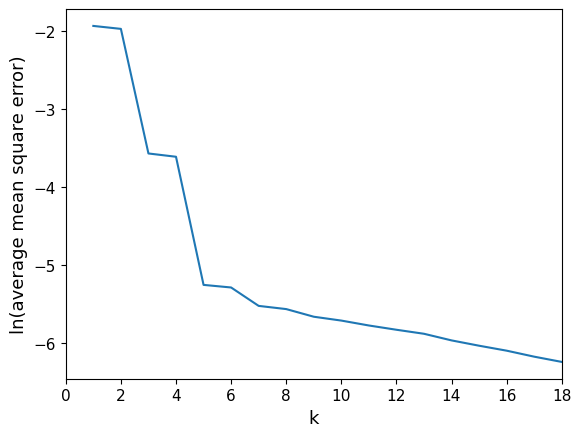

In [11]:
test_mses, train_mses = run_linear_regressions(sin_map)

log_mean_square_errors_train = np.log(np.array(train_mses).mean(axis=0))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors_train, 'MSE_100_training_3_d.png')

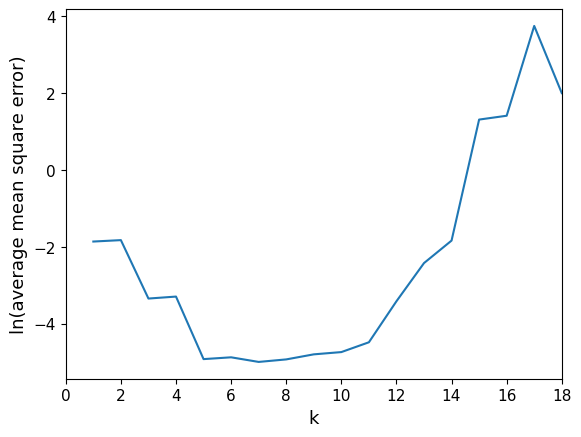

In [12]:
log_mean_square_errors_test = np.log(np.array(test_mses).mean(axis=0))
plot_and_save_mse(DIMENSIONS_TO_18, log_mean_square_errors_test,'MSE_100_testing_3_d.png')

## 1.2 Filtered Boston housing and kernels


In [13]:
from sklearn.model_selection import train_test_split


raw_data = np.genfromtxt('BostonFiltered.csv', delimiter=',', skip_header=1)
# take the final column of the dataset as the labels we're trying to predict
boston_features, boston_labels = raw_data[:, :12], raw_data[:, 12]

In [14]:
N_RUNS = 20

mse_naive_train = np.zeros(N_RUNS)
mse_naive_test = np.zeros(N_RUNS)
mse_single_train = np.zeros((N_RUNS, boston_features.shape[1]))
mse_single_test = np.zeros((N_RUNS, boston_features.shape[1]))
mse_all_train = np.zeros(N_RUNS)
mse_all_test = np.zeros(N_RUNS)

for i_run in range(N_RUNS):
    # Use i_run as random state so each run is different but the test_train_split matches the runs used for the kernel ridge regression below
    X_train, X_test, Y_train, Y_test = train_test_split(
        boston_features, boston_labels, test_size=1 / 3, random_state=i_run
    )
    train_ones = np.ones(shape=(X_train.shape[0], 1))
    test_ones = np.ones(shape=(X_test.shape[0], 1))

    # Train naive regression over ones
    w = calculate_weights(train_ones, Y_train)
    mse_naive_train[i_run] = calculate_mse(train_ones, Y_train, w)
    mse_naive_test[i_run] = calculate_mse(test_ones, Y_test, w)

    # Train on each feature individually
    for i_attribute in range(X_train.shape[1]):
        # Take the column for the attribute in question and augment with a bias term (ones)
        X_train_attr = np.hstack((X_train[:, [i_attribute]], train_ones))
        w = calculate_weights(X_train_attr, Y_train)
        mse_single_train[i_run, i_attribute] = calculate_mse(X_train_attr, Y_train, w)

        X_test_attr = np.hstack((X_test[:, [i_attribute]], test_ones))
        mse_single_test[i_run, i_attribute] = calculate_mse(X_test_attr, Y_test, w)

    # Test all features together
    X_train_all = np.hstack((X_train, train_ones))
    w = calculate_weights(X_train_all, Y_train)
    mse_all_train[i_run] = calculate_mse(X_train_all, Y_train, w)

    X_test_all = np.hstack((X_test, test_ones))
    mse_all_test[i_run] = calculate_mse(X_test_all, Y_test, w)

In [15]:
# Create a summary table
columns = ['method', 'MSE train mean', 'MSE train std', 'MSE test mean', 'MSE test std']

df_naive_regression = pd.DataFrame(
    [[
        'Naive Regression', mse_naive_train.mean(), mse_naive_train.std(), mse_naive_test.mean(), mse_naive_test.std()
    ]],
    columns=columns
)
df_naive_regression.set_index('method', inplace=True)
df_naive_regression.to_latex('naive_regression.tex', float_format="{:.2f}".format)

# Take an average over all the runs
df_single_attr_regression = pd.concat(
    (
        pd.DataFrame(mse_single_train.mean(axis=0), columns=[columns[1]]),
        pd.DataFrame(mse_single_train.std(axis=0), columns=[columns[2]]),
        pd.DataFrame(mse_single_test.mean(axis=0), columns=[columns[3]]),
        pd.DataFrame(mse_single_test.std(axis=0), columns=[columns[4]])),
    axis=1
)
# Create the labels for each attribute
df_single_attr_regression['method'] = [f'Linear Regression (attribute {i})' for i in df_single_attr_regression.index]
df_single_attr_regression.set_index('method', inplace=True)
df_single_attr_regression.to_latex('single_attr_regression.tex', float_format="{:.2f}".format)

df_all_attrs_regression = pd.DataFrame(
    [[
        'Linear Regression (all attributes)', mse_all_train.mean(), mse_all_train.std(), mse_all_test.mean(),
        mse_all_test.std()
    ]],
    columns=columns
)
df_all_attrs_regression.set_index('method', inplace=True)
df_all_attrs_regression.to_latex('all_attrs_regression.tex', float_format="{:.2f}".format)

# Combine into a summary table for all the linear regression methods
df_linear_summary = pd.concat((df_naive_regression, df_single_attr_regression, df_all_attrs_regression), axis=0)
df_linear_summary

,MSE train mean,MSE train std,MSE test mean,MSE test std
method,,,,
Naive Regression,83.440726,5.122527,86.632365,10.328741
Linear Regression (attribute 0),70.704165,5.297097,74.487469,10.532920
Linear Regression (attribute 1),72.036920,4.808761,76.793230,9.652648
Linear Regression (attribute 2),64.050570,5.162604,66.162934,10.379746
Linear Regression (attribute 3),80.346038,4.939647,85.569347,10.045357
Linear Regression (attribute 4),68.119735,5.118190,71.106973,10.182797
Linear Regression (attribute 5),43.675830,2.459439,43.808498,5.002777
Linear Regression (attribute 6),71.369356,5.380638,74.936789,10.733731
Linear Regression (attribute 7),78.044570,5.389154,81.795248,10.696096


## 1.3 Kernelised ridge regression
Generating gammas and sigmas:

In [16]:
gammas = 2 ** np.arange(-40.0, -25.0)  # 15 gammas
sigmas = 2.0 ** (7 + np.arange(0.0, 6.5, 0.5))  # 13 sigmas


$$\alpha^* = (K + \gamma l I_l)^{-1} y$$

$$y_{\text{test}} = \sum_{i=1}^{l} \alpha_i^* K(x_i, x_{\text{test}})$$

$$K(x_i, x_j) = \exp\left( -\frac{\|x_i - x_j\|^2}{2\sigma^2} \right)$$

$$\mathbf{w}^* = \arg\min_{\mathbf{w} \in \mathbb{R}^n} \left( \frac{1}{\ell} \sum_{i=1}^{\ell} (\mathbf{x}_i^T \mathbf{w} - y_i)^2 + \gamma \mathbf{w}^T \mathbf{w} \right)
$$

### 1.3 Kernelised ridge regression

In [17]:
N_RUNS = 20
N_FOLDS = 5

# Variables to store the mean square error of the cross validation, indexed by [run number, fold number, gamma index, sigma index]
mse_runs_cv_train = np.zeros(shape=(N_RUNS, N_FOLDS, len(gammas), len(sigmas)))
mse_runs_cv_test = np.zeros(shape=(N_RUNS, N_FOLDS, len(gammas), len(sigmas)))

mse_runs_train = np.zeros(N_RUNS)
mse_runs_test = np.zeros(N_RUNS)

for i_run in range(N_RUNS):
    # Use i_run as random state so each run is different but the test_train_split matches the runs used for the linear regression below
    X_train, X_test, Y_train, Y_test = train_test_split(
        boston_features, boston_labels, test_size=1 / 3, random_state=i_run
    )

    # For efficiency calculate the folds outside the loop of gamma and sigma
    folds_data: list[FoldData] = create_folds_data(X_train, Y_train, number_of_folds=N_FOLDS)

    # Loop to pick the best gamma and sigma based on the lowest cross validation error
    for i_fold, fold in enumerate(folds_data):
        fold: FoldData
        for i_sigma, sigma in enumerate(sigmas):
            K = gaussian_kernel(fold.train_data, fold.train_data, sigma=sigma)
            K_train_test = gaussian_kernel(fold.train_data, fold.test_data, sigma=sigma)

            for i_gamma, gamma in enumerate(gammas):
                alpha_star = calc_alpha_star(K, gamma, l=fold.train_data.shape[0], y=fold.train_labels)

                fold_train_prediction = alpha_star @ K  # here K is K[xi, xi] which we already calculated above
                mse_runs_cv_train[i_run, i_fold, i_gamma, i_sigma] = calculate_mse_from_labels(
                    predicted_labels=fold_train_prediction,
                    true_labels=fold.train_labels
                )

                fold_test_prediction = alpha_star @ K_train_test
                mse_runs_cv_test[i_run, i_fold, i_gamma, i_sigma] = calculate_mse_from_labels(
                    predicted_labels=fold_test_prediction,
                    true_labels=fold.test_labels
                )

    # Part (c) Pick the best gamma and sigma, and using these, create a predictor by re-training on the full 2/3 training set
    best_gamma, best_sigma, _, _ = get_best_gamma_sigma_from_cross_validation_error(mse_runs_cv_test[i_run, :, :, :], gammas=gammas, sigmas=sigmas)
    # print(best_gamma, best_sigma)

    # Create a new predictor based on the best gamma and sigma and retrained on the whole training set
    K = gaussian_kernel(X_train, X_train, sigma=best_sigma)
    alpha_star = calc_alpha_star(K, best_gamma, l=X_train.shape[0], y=Y_train)

    # Get the mse of the new training and testing over the whole dataset for this new predictor
    mse_runs_train[i_run] = calculate_mse_from_labels(predicted_labels=alpha_star @ K, true_labels=Y_train)
    mse_runs_test[i_run] = calculate_mse_from_labels(
        predicted_labels=alpha_star @ gaussian_kernel(X_train, X_test, best_sigma), true_labels=Y_test
    )

#### 5a For the first run choose the best $\gamma$ and $\sigma$
#### 5b Plot the cross-validation error as a function of $\gamma$ and $\sigma$

Best gamma (for first run) is 2^(-28.0), best sigma (for first run) is 2^(9.0)
Train mse for best gamma/sigma: 6.56
Test mse for best gamma/sigma: 15.08


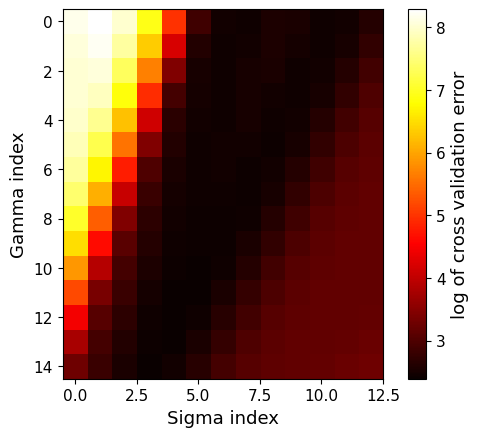

In [18]:
# We print the best gamma and sigma and plot the graph for the first run only in order to do part (a)
mse_first_run = mse_runs_cv_test[0, :, :, :]
best_gamma, best_sigma, best_gamma_index, best_sigma_index = get_best_gamma_sigma_from_cross_validation_error(mse_cv_test=mse_first_run, gammas=gammas, sigmas=sigmas)
print(f'Best gamma (for first run) is 2^({np.log2(best_gamma)}), best sigma (for first run) is 2^({np.log2(best_sigma)})')
print(f'Train mse for best gamma/sigma: {mse_runs_train[0]:0.2f}')
print(f'Test mse for best gamma/sigma: {mse_runs_test[0]:0.2f}')

plt.imshow(np.log(mse_first_run.mean(axis=0)), cmap='hot', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label('log of cross validation error')
plt.xlabel("Sigma index")
plt.ylabel("Gamma index")
plt.savefig('Cross_validation_error_5_bi.png', dpi=300)
plt.show()

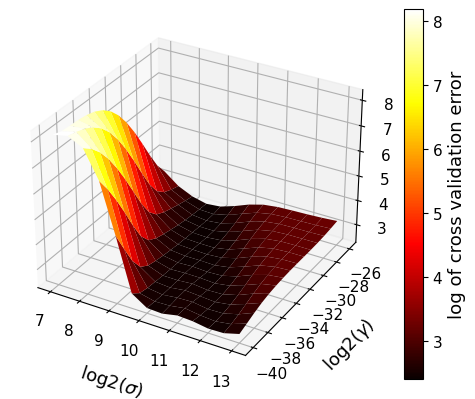

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(sigmas, gammas)
surf = ax.plot_surface(np.log2(X), np.log2(Y), np.log(mse_first_run.mean(axis=0)), cmap='hot')
cbar = fig.colorbar(surf, ax=ax)
cbar.set_label('log of cross validation error')
plt.xlabel("log2($\sigma$)", labelpad=10)
plt.ylabel("log2($\gamma$)", labelpad=10)
plt.show()
fig.savefig('Cross_validation_error_5_bii.png', dpi=300)

#### 5d Create a summary table for the 20 random splits of data

In [20]:
# Create a summary table for the kernel ridge regression
df_kernel_regression = pd.DataFrame(
    [
        ['Kernel Ridge Regression', mse_runs_train.mean(), mse_runs_train.std(), mse_runs_test.mean(),
         mse_runs_test.std()],
    ], columns=columns
)
df_kernel_regression.set_index('method', inplace=True)
df_kernel_regression.to_latex('kernel_regression.tex', float_format="{:.2f}".format)
df_kernel_regression

,MSE train mean,MSE train std,MSE test mean,MSE test std
method,,,,
Kernel Ridge Regression,7.339824,1.038172,12.955257,1.717274


In [21]:
# Create an overall summary table from the linear and kernel ridge regression summaries
df_summary = pd.concat((df_linear_summary, df_kernel_regression), axis=0)
df_summary.to_latex('summary_table.tex', float_format="{:.2f}".format)
df_summary

,MSE train mean,MSE train std,MSE test mean,MSE test std
method,,,,
Naive Regression,83.440726,5.122527,86.632365,10.328741
Linear Regression (attribute 0),70.704165,5.297097,74.487469,10.532920
Linear Regression (attribute 1),72.036920,4.808761,76.793230,9.652648
Linear Regression (attribute 2),64.050570,5.162604,66.162934,10.379746
Linear Regression (attribute 3),80.346038,4.939647,85.569347,10.045357
Linear Regression (attribute 4),68.119735,5.118190,71.106973,10.182797
Linear Regression (attribute 5),43.675830,2.459439,43.808498,5.002777
Linear Regression (attribute 6),71.369356,5.380638,74.936789,10.733731
Linear Regression (attribute 7),78.044570,5.389154,81.795248,10.696096


## Part II

### 2.1 k-Nearest Neighbors
#### 2.1.1 Generating the data

In [22]:
V = 3

# Create a grid of x and y points for the background of the plot
grid_size = 100
x_range_plt = np.linspace(0, 1, grid_size)
y_range_plt = np.linspace(0, 1, grid_size)
grid = np.array([[i, j] for i in x_range_plt for j in y_range_plt])

centres, labels = sample_h()
nearest_neighbours = find_nearest_neighbours(X_test=grid, X_train=centres, Y_train=labels, k=V)

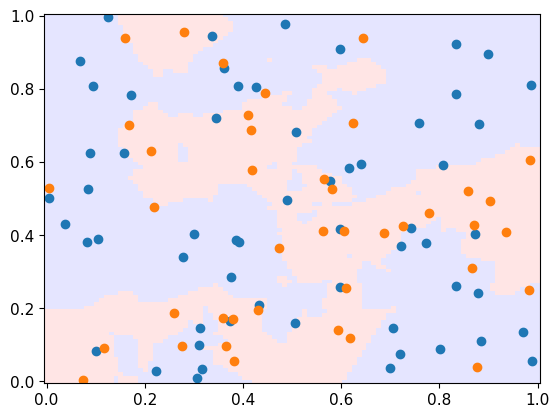

In [23]:
fig, ax = plt.subplots()
x, y = np.meshgrid(x_range_plt, y_range_plt)
c = ax.pcolormesh(x, y, nearest_neighbours.reshape(grid_size, grid_size).T, cmap='bwr', shading='auto', alpha=0.1)

ax.plot(centres[labels == 0, :][:, 0], centres[labels == 0, :][:, 1], 'o')
ax.plot(centres[labels == 1, :][:, 0], centres[labels == 1, :][:, 1], 'o')

fig.savefig('2_2_1_1_kNN_hypothesis.png', dpi=300)

#### 2.1.2 Estimated generalization error of k-NN as a function of k

In [24]:
N_RUNS = 100
N_test_points = 1000
N_ks = 49

error_rates = run_nearest_neighbours(
    n_training_points=np.array([4000]),
    n_test_points=N_test_points,
    n_runs=N_RUNS,
    n_ks=N_ks
)

#### 2.1.2a Produce visualisation using Protocol A

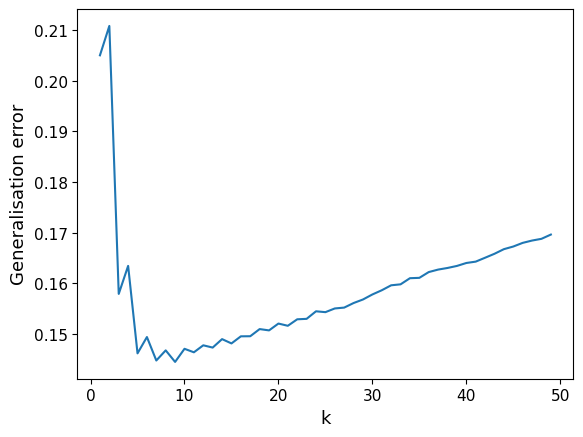

In [25]:
error_rate_per_k = error_rates[0].mean(axis=0)

fig, ax = plt.subplots()
ax.plot(np.arange(1, N_ks + 1, step=1), error_rate_per_k)

plt.xlabel("k")
plt.ylabel("Generalisation error")
fig.savefig('2_2_1_2_error_rate.png', dpi=300)

#### 2.1.3 Determine the optimal k as a function of the number of training points (m)

In [26]:
# Set up the array of m values
ms = np.arange(0, 4500, step=500)
ms[0] = 100

error_rates_across_all = run_nearest_neighbours(
    n_training_points=ms,
    n_test_points=N_test_points,
    n_runs=N_RUNS,
    n_ks=N_ks
)

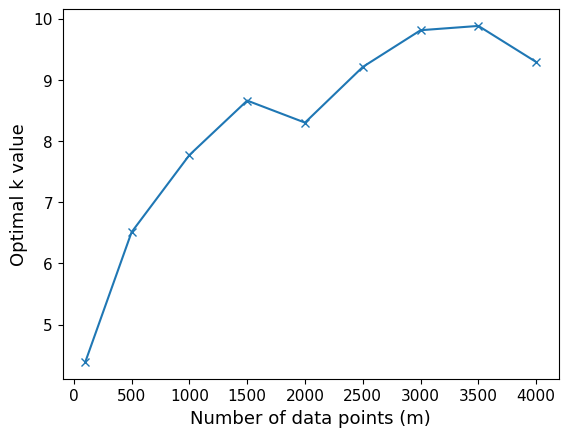

In [27]:
# Given an array of errors indexed across [n_training_points, n_runs, n_ks] we argsort on the k axis to find
# the k index which gives the lowest error (e.g. index of optimal k) and then +1 is to get the k value
optimal_k_per_run_and_m = error_rates_across_all.argsort(axis=2)[:, :, 0] + 1

# Average across the runs to get the optimal k per number of training points
optimal_k_per_m = optimal_k_per_run_and_m.mean(axis=1)

fig, ax = plt.subplots()
ax.plot(ms, optimal_k_per_m, 'x-') 
plt.xlabel("Number of data points (m)")
plt.ylabel("Optimal k value")
# uncomment to plot the rounded mean k (integer version, as k must be an int in k-NN)
# ax.plot(ms, np.round(optimal_k_per_m), 'x-') 
fig.savefig('2_2_1_3_optimal_k.png', dpi=300)